In [1]:
from plot.bell_plotting_helpers import *

### Bell state: plot cycles vs. p_error 

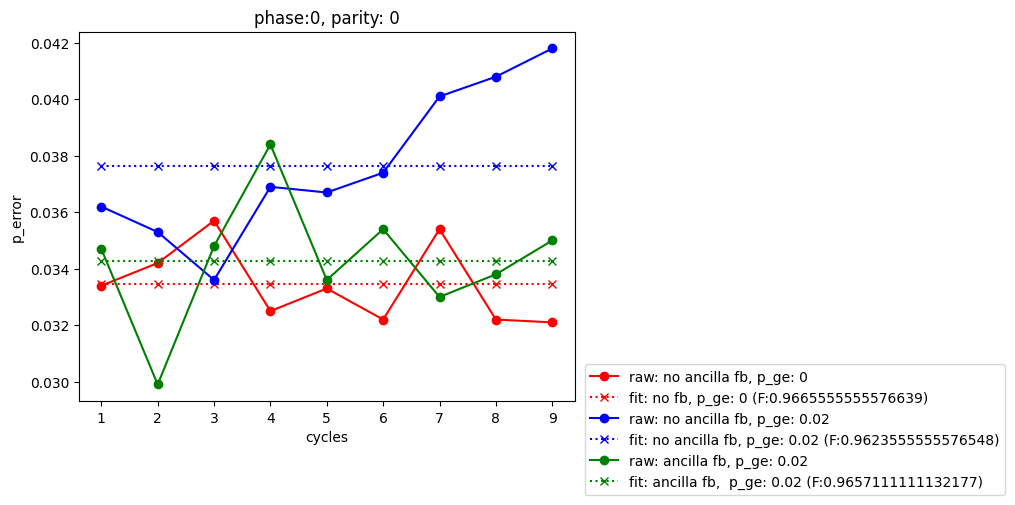

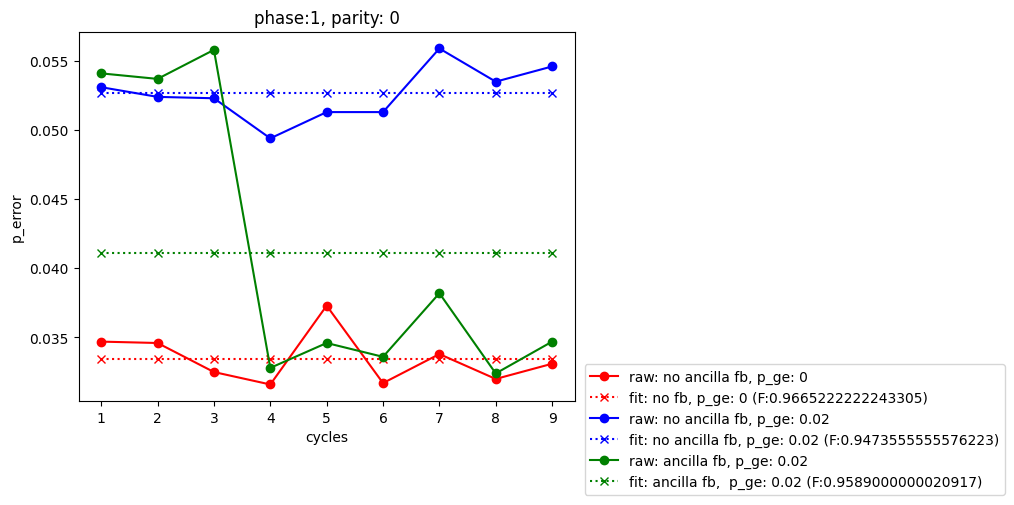

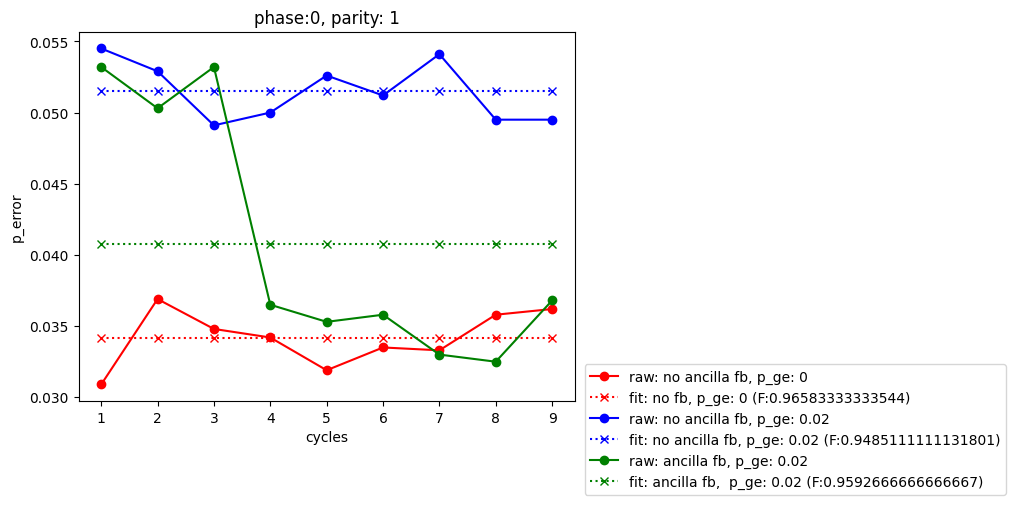

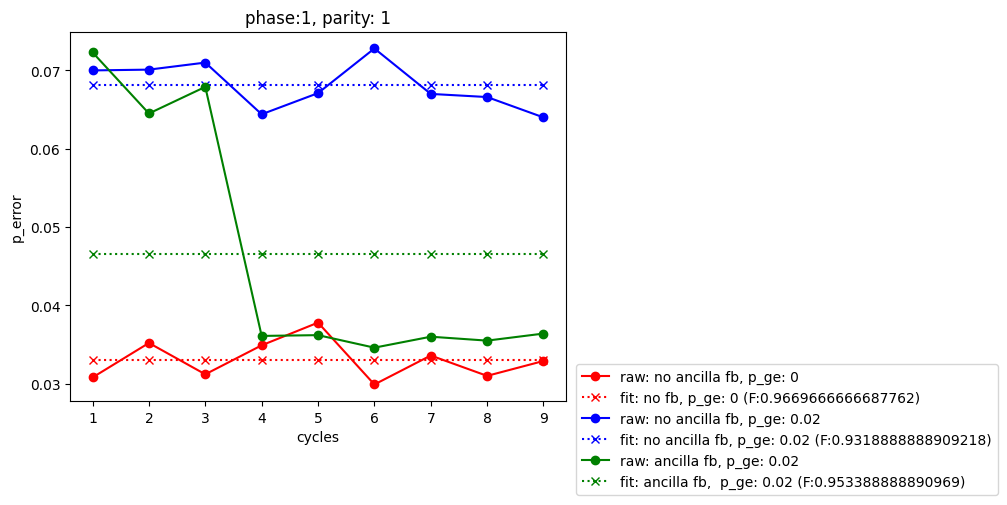

In [78]:
# for ancilla_fb_rnd[1,2,3]:
# for p_amp_ge  in [0.01, 0.02]:

runs = 10
after_clifford_depolarization_1 =0.001
after_clifford_depolarization_2 = 0.01
after_reset_flip_probability = 0
before_measure_flip_probability = 0
before_round_data_depolarization = 0
for p_amp_ge  in 0.01,[0.02,0.03]:
        for parity, phase in [(0,0), (0,1), (1,0), (1,1)]:
        # for parity, phase in [(0,0), (1,1)]:
                compare_4(parity=parity, phase=phase, ancilla_reset=True,
                after_clifford_depolarization_1 = after_clifford_depolarization_1,
                after_clifford_depolarization_2 = after_clifford_depolarization_2,
                after_reset_flip_probability = after_reset_flip_probability,
                before_measure_flip_probability = before_measure_flip_probability,
                before_round_data_depolarization = before_round_data_depolarization, 
                runs = runs,
                p_amp_ge=p_amp_ge)
                plt.savefig(f'plot/bell/Bell__peg{p_amp_ge}_polerr1{0.001}_polerr1{0.01}_rep{runs}.png')
                plt.ylim([0,15])
                plt.show()


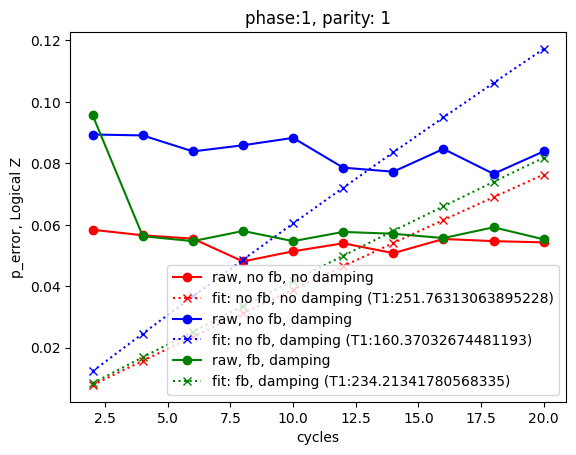

In [22]:
# for ancilla_fb_rnd[1,2,3]:

compare_4(parity=1, phase=1, ancilla_reset=True,
after_clifford_depolarization_1 = 0.001,
after_clifford_depolarization_2 = 0.01,
after_reset_flip_probability = 0.01,
before_measure_flip_probability = 0.001,
before_round_data_depolarization = 0.001, 
max_error=0.02,
runs = 10000,
p_amp_ge=0.02)

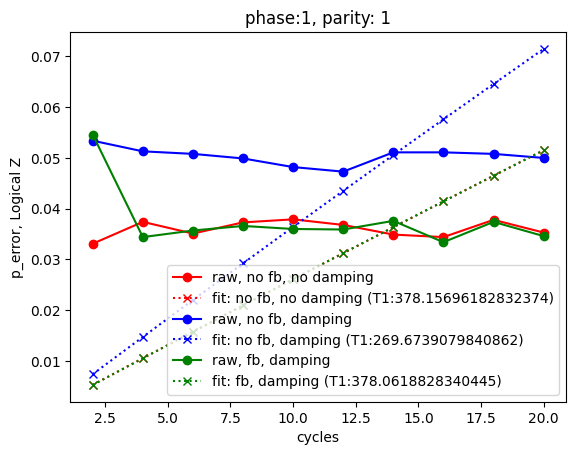

In [23]:
compare_4(parity=1, phase=1, ancilla_reset=True,
after_clifford_depolarization_1 = 0.001,
after_clifford_depolarization_2 = 0.01,
after_reset_flip_probability = 0.001,
before_measure_flip_probability = 0.00,
before_round_data_depolarization = 0.00, 
max_error=0.01,
runs = 10000,
p_amp_ge=0.01)

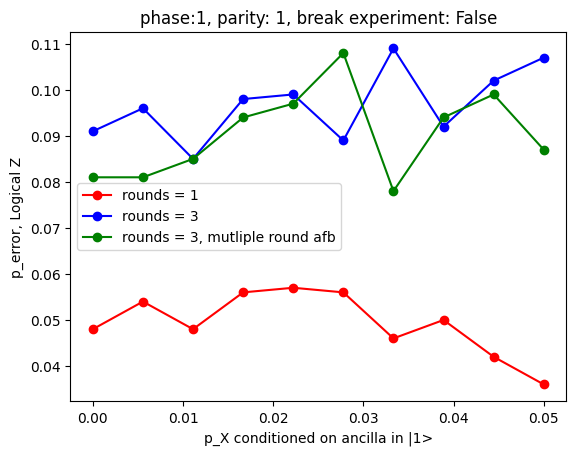

In [114]:
compare_new(parity=1, phase=1, ancilla_reset=True,
            after_clifford_depolarization_1 = 0.001,
                    after_clifford_depolarization_2 = 0.01,
                    after_reset_flip_probability = 0.01,
                    before_measure_flip_probability = 0.00,
                    before_round_data_depolarization = 0.00, 
                    cycles = 18,
                    max_error=0.05)

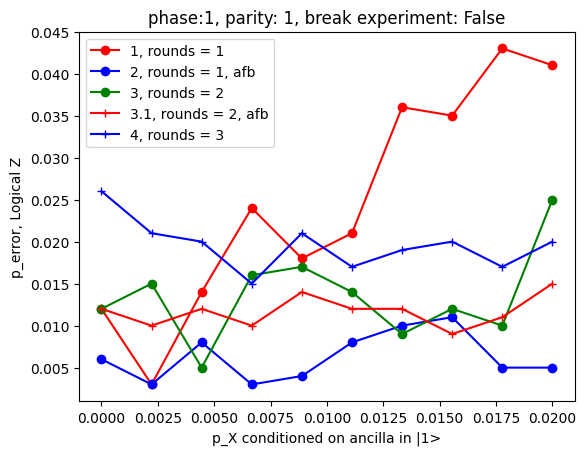

In [7]:
#phi11, constant rounds
compare_adapt(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.0,
                    before_measure_flip_probability = 0.0,
                    before_round_data_depolarization = 0.0, break_experiment=False)

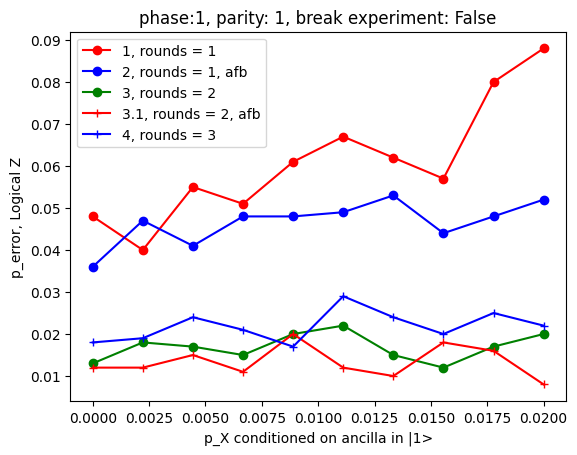

In [8]:
#phi11, constant rounds
compare_adapt(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.01,
                    before_measure_flip_probability = 0.01,
                    before_round_data_depolarization = 0.0, break_experiment=False)

In [10]:
#phi11, constant rounds
errors_11, errors_21, errors_31, errors_41, errors_51 = errors_sym_vs_asym(parity=1, phase= 1, break_experiment=False, 
                                                                            after_clifford_depolarization= 0.001, 
                                                                            after_reset_flip_probability = 0.0,
                                                                            before_measure_flip_probability= 0.01, 
                                                                            before_round_data_depolarization=0.00,
                                                                            max_ge = 0.02,
                                                                            max_flip_prob = 0.02)

In [17]:
#NOTE: Dies kreiert ein sweeper plot wo man den parameter before_measure_flip_probability sweept (sym error)
#Das plot ist unter ''sym_vs_asym_error.mp4' im folder dieses notebooks gespeichert

from matplotlib import animation
import matplotlib.pyplot as plt

p_ge_range = np.linspace(0.0, 0.02, 10)
p_x_err_range = np.linspace(0.0, 0.02,10)

fig = plt.figure()
ax = plt.axes(xlim = (min(p_ge_range), max(p_ge_range)),
              ylim = (0.0 , 0.25),
              xticks = (list(p_ge_range)),
              yticks = (np.linspace(0.0, 0.25, 20))
              )

pts, = ax.plot([], [], '.')

def init():
    pts.set_data([], [])
    return pts,

def animate(i):
    plt.clf()
    # Refresh the plot
    plt.title('sym error = {}'.format(p_x_err_range[i]))
    #ax.set_title("Symmtric error #{}".format(p_x_err_range[i]))
    #pts.set_data(p_ge_range, errors_1[:, i]) # plotting space axis at time-step i
    #pts.set_data(p_ge_range, errors_2[:, i]) # plotting space axis at time-step i
    plt.xlabel("Asymmetric error")
    plt.ylabel("logical error")
     
    plt.plot(p_ge_range, errors_11[:,i], label = "1 rounds", marker = "o", color = "r")
    plt.plot(p_ge_range, errors_21[:,i], label = "1 rounds, ancilla fb", marker = "+", color = "r") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_31[:,i], label = "2 rounds", marker = "o", color = "b")
    plt.plot(p_ge_range, errors_41[:,i], label = "2 rounds, ancilla fb", marker = "+", color = "b") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_51[:,i], label = "3 rounds, ancilla fb", marker = "o", color = "g")

    plt.xlim(min(p_ge_range), max(p_ge_range))    # points at the boundary of the domain can be seen entirely
    plt.xticks(list(p_ge_range))
    plt.ylim(-0.05 , 0.15)       # points at the boundary of the domain can be seen entirely
    plt.yticks(np.linspace(0.0, 0.15, 10))
    plt.legend()

    #return pts,

# Set animation speed and duration
frame_dt = 1.0 #[s] 
frames_n = 10

# Create and save animation
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames = frames_n, 
                               interval = int(1000 / frame_dt),  #[ms] 
                               blit = False
                               )
anim.save('sym_vs_asym_error.mp4', fps = 1 / frame_dt, extra_args=['-vcodec', 'libx264'])




In [13]:
#phi11, constant rounds
errors_12, errors_22, errors_32, errors_42, errors_52 = errors_reset_vs_asym(parity=1, phase= 1, break_experiment=False, 
                                                                            after_clifford_depolarization= 0.001,
                                                                            before_measure_flip_probability= 0.0, 
                                                                            before_round_data_depolarization=0.00,
                                                                            max_ge = 0.02,
                                                                            max_flip_prob = 0.02)

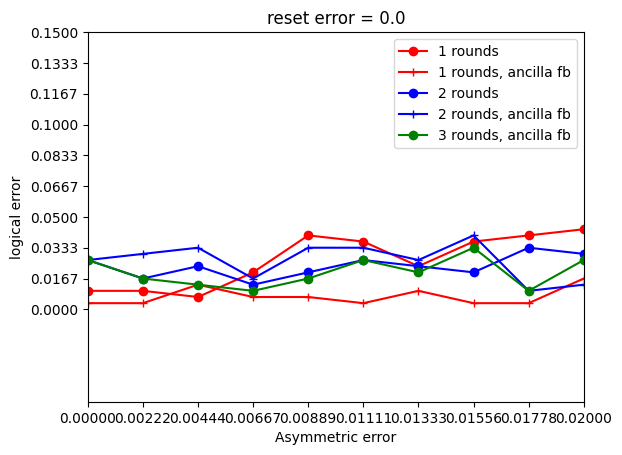

In [18]:
#NOTE: Dies kreiert ein sweeper plot wo man den parameter after_reset_flip_probability sweept
#Das plot ist unter 'reset_vs_asym_error.mp4' im folder dieses notebooks gespeichert

from matplotlib import animation

p_ge_range = np.linspace(0.0, 0.02, 10)
p_x_err_range = np.linspace(0.0,0.02,10)

fig = plt.figure()
ax = plt.axes(xlim = (min(p_ge_range), max(p_ge_range)),
              ylim = (0.0 , 0.25),
              xticks = (list(p_ge_range)),
              yticks = (np.linspace(0.0, 0.25, 20))
              )

pts, = ax.plot([], [], '.')

def init():
    pts.set_data([], [])
    return pts,

def animate(i):
    plt.clf()
    # Refresh the plot
    plt.title('reset error = {}'.format(p_x_err_range[i]))
    #ax.set_title("Symmtric error #{}".format(p_x_err_range[i]))
    #pts.set_data(p_ge_range, errors_1[:, i]) # plotting space axis at time-step i
    #pts.set_data(p_ge_range, errors_2[:, i]) # plotting space axis at time-step i
    plt.xlabel("Asymmetric error")
    plt.ylabel("logical error")
     
    plt.plot(p_ge_range, errors_12[:,i], label = "1 rounds", marker = "o", color = "r")
    plt.plot(p_ge_range, errors_22[:,i], label = "1 rounds, ancilla fb", marker = "+", color = "r") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_32[:,i], label = "2 rounds", marker = "o", color = "b")
    plt.plot(p_ge_range, errors_42[:,i], label = "2 rounds, ancilla fb", marker = "+", color = "b") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_52[:,i], label = "3 rounds, ancilla fb", marker = "o", color = "g")

    plt.xlim(min(p_ge_range), max(p_ge_range))    # points at the boundary of the domain can be seen entirely
    plt.xticks(list(p_ge_range))
    plt.ylim(-0.05 , 0.15)       # points at the boundary of the domain can be seen entirely
    plt.yticks(np.linspace(0.0, 0.15, 10))
    plt.legend()

    #return pts,

# Set animation speed and duration
frame_dt = 1.0 #[s] 
frames_n = 10

# Create and save animation
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames = frames_n, 
                               interval = int(1000 / frame_dt),  #[ms] 
                               blit = False
                               )
anim.save('reset_vs_asym_error.mp4', fps = 1 / frame_dt, extra_args=['-vcodec', 'libx264'])




Now we do the same plots again but with break_experiment = TRUE, i.e. we end the experiment if for a given number of cycles 
we have seen the right parity constantly



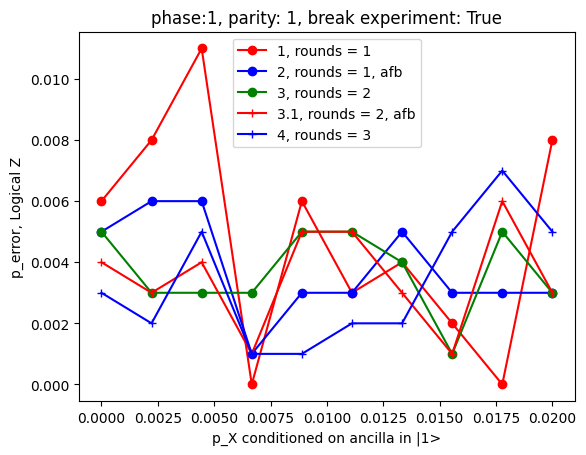

In [19]:
#phi11, variable rounds
compare_adapt(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.0,
                    before_measure_flip_probability = 0.0,
                    before_round_data_depolarization = 0.0, break_experiment=True)

In [20]:
#phi11, varying rounds
compare_adapt(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.01,
                    before_measure_flip_probability = 0.01,
                    before_round_data_depolarization = 0.0, break_experiment=True)

In [24]:
#phi11, constant rounds
errors_11_b, errors_21_b, errors_31_b, errors_41_b, errors_51_b = errors_sym_vs_asym(parity=1, phase= 1, break_experiment=True, 
                                                                            after_clifford_depolarization= 0.001, 
                                                                            after_reset_flip_probability = 0.0,
                                                                            before_measure_flip_probability= 0.01, 
                                                                            before_round_data_depolarization=0.00,
                                                                            max_ge = 0.02,
                                                                            max_flip_prob = 0.02)

In [29]:
#NOTE: Dies kreiert ein sweeper plot wo man den parameter before_measure_flip_probability sweept (sym error)
#Das plot ist unter ''sym_vs_asym_break_error.mp4' im folder dieses notebooks gespeichert

from matplotlib import animation
import matplotlib.pyplot as plt

p_ge_range = np.linspace(0.0, 0.02, 10)
p_x_err_range = np.linspace(0.0, 0.02,10)

fig = plt.figure()
ax = plt.axes(xlim = (min(p_ge_range), max(p_ge_range)),
              ylim = (0.0 , 0.25),
              xticks = (list(p_ge_range)),
              yticks = (np.linspace(0.0, 0.25, 20))
              )

pts, = ax.plot([], [], '.')

def init():
    pts.set_data([], [])
    return pts,

def animate(i):
    plt.clf()
    # Refresh the plot
    plt.title('sym error = {}'.format(p_x_err_range[i]))
    #ax.set_title("Symmtric error #{}".format(p_x_err_range[i]))
    #pts.set_data(p_ge_range, errors_1[:, i]) # plotting space axis at time-step i
    #pts.set_data(p_ge_range, errors_2[:, i]) # plotting space axis at time-step i
    plt.xlabel("Asymmetric error")
    plt.ylabel("logical error, break experiment")
     
    plt.plot(p_ge_range, errors_11_b[:,i], label = "1 rounds", marker = "o", color = "r")
    plt.plot(p_ge_range, errors_21_b[:,i], label = "1 rounds, ancilla fb", marker = "+", color = "r") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_31_b[:,i], label = "2 rounds", marker = "o", color = "b")
    plt.plot(p_ge_range, errors_41_b[:,i], label = "2 rounds, ancilla fb", marker = "+", color = "b") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_51_b[:,i], label = "3 rounds, ancilla fb", marker = "o", color = "g")

    plt.xlim(min(p_ge_range), max(p_ge_range))    # points at the boundary of the domain can be seen entirely
    plt.xticks(list(p_ge_range))
    plt.ylim(-0.05 , 0.1)       # points at the boundary of the domain can be seen entirely
    plt.yticks(np.linspace(0.0, 0.1, 10))
    plt.legend()

    #return pts,

# Set animation speed and duration
frame_dt = 1.0 #[s] 
frames_n = 10

# Create and save animation
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames = frames_n, 
                               interval = int(1000 / frame_dt),  #[ms] 
                               blit = False
                               )
anim.save('sym_vs_asym_break_error.mp4', fps = 1 / frame_dt, extra_args=['-vcodec', 'libx264'])




In [26]:
#phi11, constant rounds
errors_12_b, errors_22_b, errors_32_b, errors_42_b, errors_52_b = errors_reset_vs_asym(parity=1, phase= 1, break_experiment=True, 
                                                                            after_clifford_depolarization= 0.001,
                                                                            before_measure_flip_probability= 0.0, 
                                                                            before_round_data_depolarization=0.00,
                                                                            max_ge = 0.02,
                                                                            max_flip_prob = 0.02)

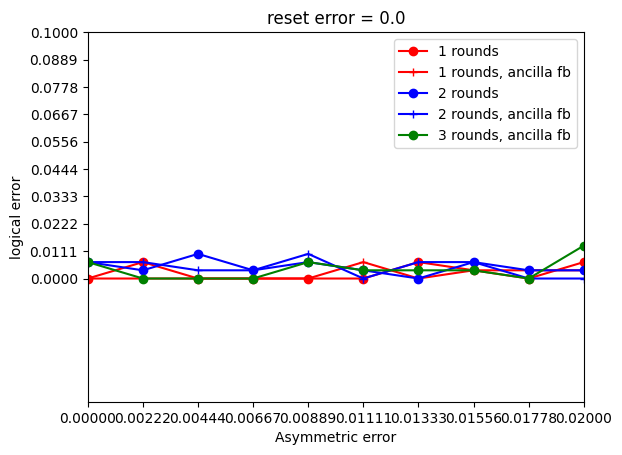

In [28]:
#NOTE: Dies kreiert ein sweeper plot wo man den parameter after_reset_flip_probability sweept
#Das plot ist unter 'reset_vs_asym_break_error.mp4' im folder dieses notebooks gespeichert

from matplotlib import animation

p_ge_range = np.linspace(0.0, 0.02, 10)
p_x_err_range = np.linspace(0.0,0.02,10)

fig = plt.figure()
ax = plt.axes(xlim = (min(p_ge_range), max(p_ge_range)),
              ylim = (0.0 , 0.25),
              xticks = (list(p_ge_range)),
              yticks = (np.linspace(0.0, 0.25, 20))
              )

pts, = ax.plot([], [], '.')

def init():
    pts.set_data([], [])
    return pts,

def animate(i):
    plt.clf()
    # Refresh the plot
    plt.title('reset error = {}'.format(p_x_err_range[i]))
    #ax.set_title("Symmtric error #{}".format(p_x_err_range[i]))
    #pts.set_data(p_ge_range, errors_1[:, i]) # plotting space axis at time-step i
    #pts.set_data(p_ge_range, errors_2[:, i]) # plotting space axis at time-step i
    plt.xlabel("Asymmetric error")
    plt.ylabel("logical error")
     
    plt.plot(p_ge_range, errors_12_b[:,i], label = "1 rounds", marker = "o", color = "r")
    plt.plot(p_ge_range, errors_22_b[:,i], label = "1 rounds, ancilla fb", marker = "+", color = "r") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_32_b[:,i], label = "2 rounds", marker = "o", color = "b")
    plt.plot(p_ge_range, errors_42_b[:,i], label = "2 rounds, ancilla fb", marker = "+", color = "b") # plotting space axis at time-step i
    plt.plot(p_ge_range, errors_52_b[:,i], label = "3 rounds, ancilla fb", marker = "o", color = "g")

    plt.xlim(min(p_ge_range), max(p_ge_range))    # points at the boundary of the domain can be seen entirely
    plt.xticks(list(p_ge_range))
    plt.ylim(-0.05 , 0.1)       # points at the boundary of the domain can be seen entirely
    plt.yticks(np.linspace(0.0, 0.1, 10))
    plt.legend()

    #return pts,

# Set animation speed and duration
frame_dt = 1.0 #[s] 
frames_n = 10

# Create and save animation
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames = frames_n, 
                               interval = int(1000 / frame_dt),  #[ms] 
                               blit = False
                               )
anim.save('reset_vs_asym_break_error.mp4', fps = 1 / frame_dt, extra_args=['-vcodec', 'libx264'])




### Now plot the #cycles (for Liberto rounds) vs logical error,first with no early ending of the experiment and then with (break_experiment = True)


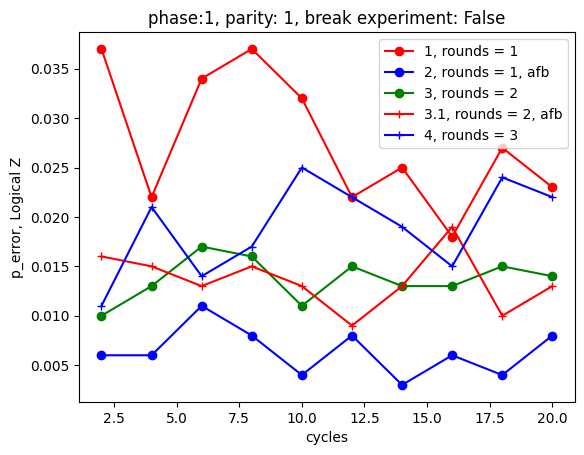

In [40]:

compare_cycles(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.0,
                    before_measure_flip_probability = 0.0,
                    before_round_data_depolarization = 0.0, break_experiment=False)

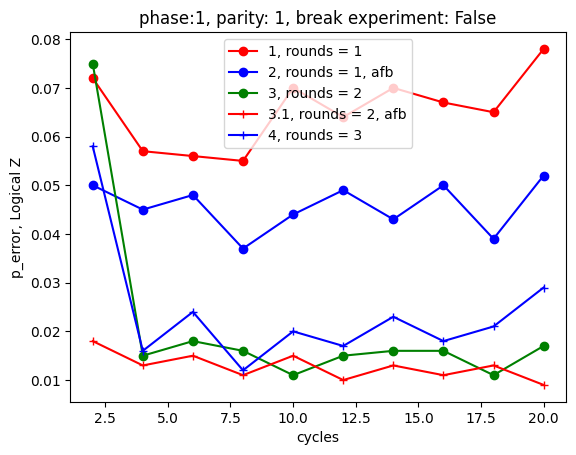

In [41]:
compare_cycles(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.01,
                    before_measure_flip_probability = 0.01,
                    before_round_data_depolarization = 0.0, break_experiment=False)

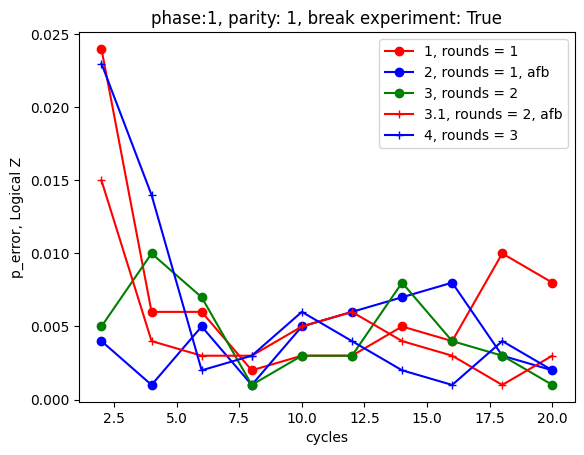

In [42]:

compare_cycles(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.0,
                    before_measure_flip_probability = 0.0,
                    before_round_data_depolarization = 0.0, break_experiment=True)

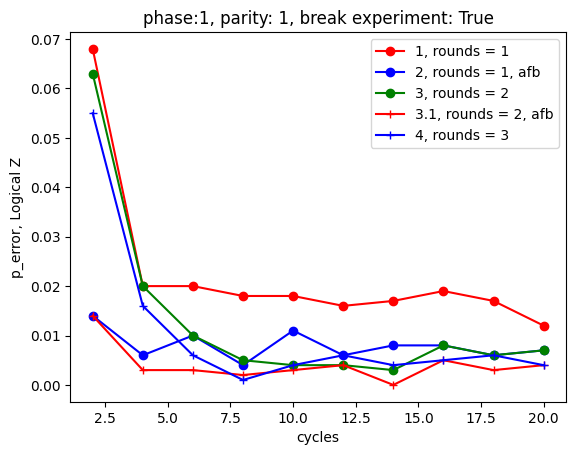

In [43]:
compare_cycles(phase = 1, parity=1, after_clifford_depolarization = 0.001,
                    after_reset_flip_probability = 0.01,
                    before_measure_flip_probability = 0.01,
                    before_round_data_depolarization = 0.0, break_experiment=True)